In [1]:
"""
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
import zipfile, os
with zipfile.ZipFile(os.getcwd() + '/celeba.zip', 'r') as zip_ref:
  zip_ref.extractall(os.getcwd()+'/data_faces')
"""

"\n!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip\nimport zipfile, os\nwith zipfile.ZipFile(os.getcwd() + '/celeba.zip', 'r') as zip_ref:\n  zip_ref.extractall(os.getcwd()+'/data_faces')\n"

In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import os
from numpy import asarray
import numpy as np
from PIL import Image
from matplotlib import pyplot

Using TensorFlow backend.


In [3]:
datagen = keras.preprocessing.image.ImageDataGenerator()
path = os.getcwd() + '/data_faces'
train_it = datagen.flow_from_directory(path,
                                       batch_size= 36,
                                       classes=None,
                                       shuffle= False,
                                       target_size= (218, 178))

Found 202599 images belonging to 1 classes.


In [4]:
def load_image(filename):
  image = Image.open(filename)
  image = image.convert('RGB')
  pixels = asarray(image)
  return pixels

def load_faces(directory, n_faces):
  faces = list()
  for filename in listdir(directory):
    pixels = load_image(directory + filename)
    faces.append(pixels)
    if len(faces) >= n_faces:
      break
  return asarray(faces)

def plot_faces(faces, n):
  for i in range(n * n):
    pyplot.subplot(n, n, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(faces[i])
  pyplot.show()

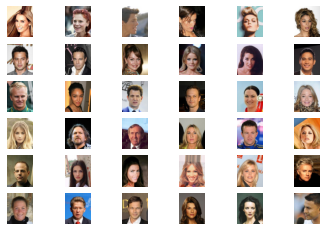

In [5]:
batchX, batchy = train_it.next()
plot_faces(batchX.astype('uint8'), 6)
# print('Loaded: ', faces.shape)